In [1]:
# This notebook looks at the Academy of Finland funding decisions for the September 2019 calls
# reads the funding decision(s), 
# builds a map with the word frequency from the titles of the funded research projects,
# generates a world cloud for visualisation
#
# Prepared by Octavian Andrei, 2020
#
#
# 2020-04-27: Research Council for Biosciences, Health and the Environment
# 2020-05-07: Research Council for Culture and Society
# 2020-05-12: Research Council for Natural Sciences and Engineering

In [2]:
import pandas as pd
import operator
import wordcloud
from matplotlib import pyplot as plt

## Customised functions

In [3]:
# handy functions
def readfile(file):
    """Reads the AKA decision into a dataframe object"""
    # read file
    data = pd.read_html(file)[0].dropna(axis=0, how='all').reset_index(drop=True)
    # split
    header = data.loc[:7, :].copy()
    data = data.loc[8:, :].copy()
    # cleansing
    data[6] = data[6].str.replace(" ","").astype('int')
    #data.columns = cols
    
    return header, data


def calculate_frequencies(text):
    """Returns word frequency map without punctuation and uninteresting words"""
    
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just"]
    
    # split text in words
    words = [word.lower() for word in text.split()]

    frequencies = {}
    for word in words:
        # clean
        corrected_word = ''
        for c in word:
            if (c not in punctuations):
                corrected_word += c
        # disregard 
        if (corrected_word in uninteresting_words) or (len(corrected_word)<=3):
            continue
        # count
        frequencies[corrected_word] = frequencies.get(corrected_word, 0) + 1
    
    return frequencies



## Input data

In [4]:
query = 'https://akareport.aka.fi/ibi_apps/WFServlet?IBIF_ex=x_RahPaatYht_report2&HAKU=201900000000{}&TMK={}&LAJITTELU=PAATOS&UILANG=en'

In [5]:
# input datafiles
files = [query.format(haku, tmk) for tmk in ['BTY', 'KY', 'LT'] for haku in (789,790)]
cols = ['Applicant', 'Organisation', 'ProjectTitle', 'DecisionNo', 'DecisionDate', 'FundingPeriod', 'Amount']


## Working with one file

In [6]:
# Post-doc, NSE
header, df = readfile(files[4])

In [7]:
print(header.loc[2,1])
print(header.loc[3,1])

Research Council for Natural Sciences and Engineering
2019 Postdoctoral Researcher


In [8]:
# Who has received the funding?
df[1].value_counts()

AALTO     16
HY        11
OY         6
VTT OY     2
TAU        2
UEF        1
ÅA         1
LUKE       1
JYU        1
IL         1
LUT        1
Name: 1, dtype: int64

In [9]:
# How many projects were funded?
df[1].value_counts().sum(), header.loc[4,1]

(43, '43')

In [10]:
# How much was the total fundings?
df[6].sum(), header.loc[5,1]

(10931020, '10 931 020 €')

In [11]:
from IPython.display import Image

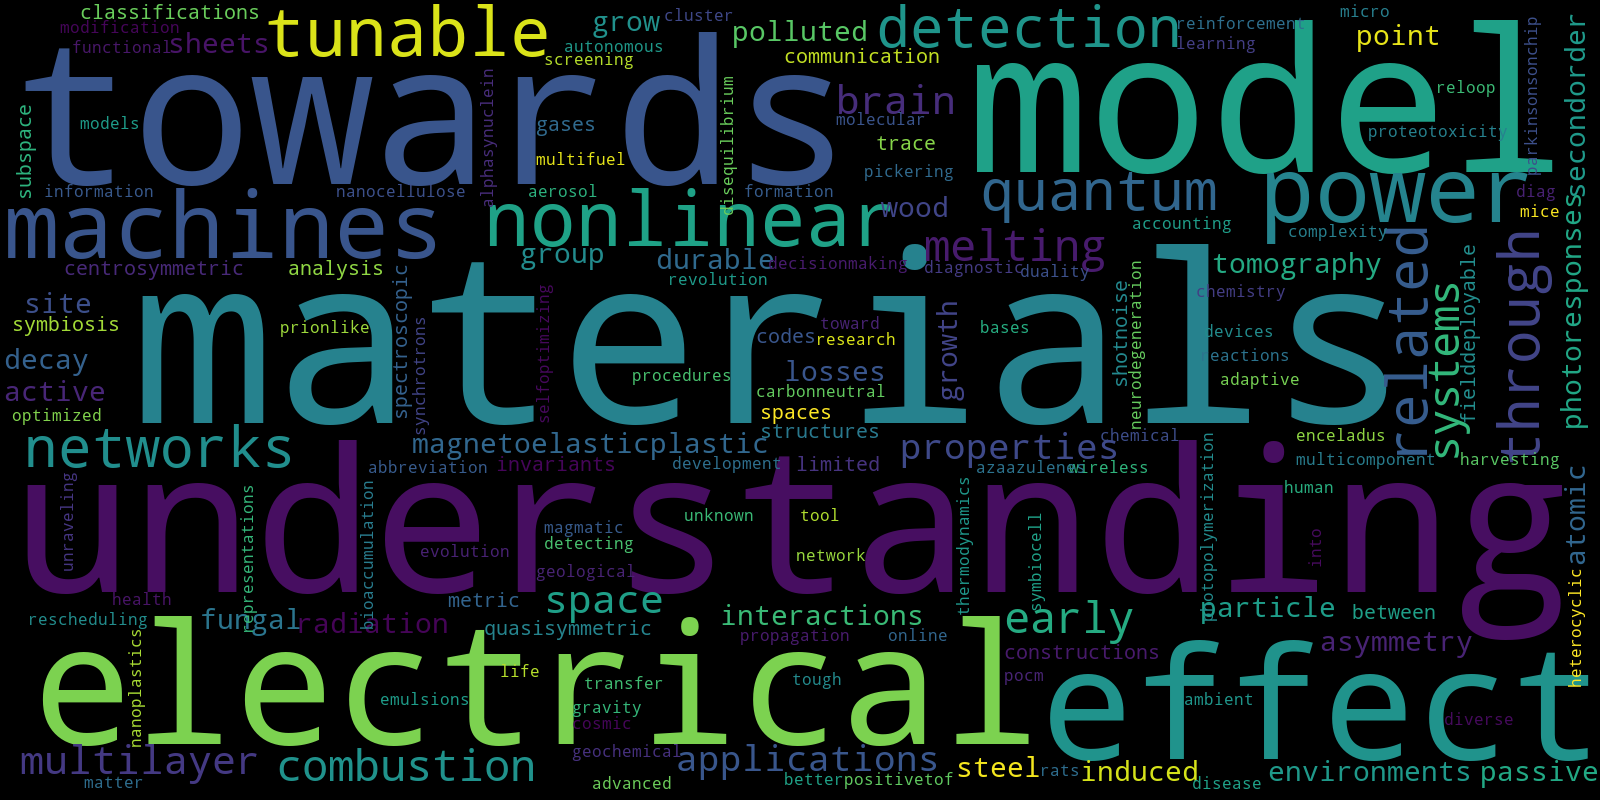

In [12]:
# 
text = ' '.join(df[2])
frequencies = calculate_frequencies(text)
cloud = wordcloud.WordCloud(scale=4)
cloud.generate_from_frequencies(frequencies)
cloud.to_file("aka.png")

Image(filename='aka.png', width=400) 

In [13]:
sorted(frequencies.items(), key=lambda  x: x[1], reverse=True)[:20]

[('materials', 3),
 ('understanding', 3),
 ('towards', 3),
 ('model', 3),
 ('electrical', 2),
 ('effect', 2),
 ('power', 2),
 ('machines', 2),
 ('nonlinear', 2),
 ('tunable', 2),
 ('quantum', 2),
 ('detection', 2),
 ('related', 2),
 ('networks', 2),
 ('through', 2),
 ('melting', 2),
 ('systems', 2),
 ('early', 2),
 ('combustion', 2),
 ('multilayer', 2)]

In [14]:
# 
for file in files:
    data = readfile(file)
    print(data[0].loc[2,1])
    print(data[0].loc[3,1])
    print(data[0].loc[4,1])
    print()
    print(data[1][1].value_counts().to_string())
    print(('=')*10,'\n')

Research Council for Biosciences, Health and Environment
2019 Postdoctoral Researcher
33

University of Helsinki                 15
University of Eastern Finland           8
University of Turku                     5
University of Jyväskylä                 1
Finnish Meteorological Institute        1
Natural Resources Institute Finland     1
Aalto University                        1
Tampere University                      1

Research Council for Biosciences, Health and Environment
2019 Academy Research Fellow
24

University of Helsinki                  10
University of Turku                      4
University of Jyväskylä                  2
Natural Resources Institute Finland      2
University of Oulu                       1
University of Eastern Finland            1
Helsinki University Central Hospital     1
Aalto University                         1
Tampere University                       1
Finnish Meteorological Institute         1

Research Council for Culture and Society
2019 Postdo

## Research Council for Biosciences, Health and Environment

In [15]:
# Research Council for Biosciences, Health and Environment
z = dict()
for file in files[:2]:
    header, df = readfile(file)
    text = ' '.join(df[2])
    frequencies = calculate_frequencies(text)
    for k, v in frequencies.items():
        #print(k, v, frequencies.get(k, 0))
        z[k] = z.get(k, 0) + frequencies.get(k, 0)



sorted(z.items(), key=operator.itemgetter(1), reverse=True)[:20]

[('mechanisms', 8),
 ('cancer', 7),
 ('carbon', 5),
 ('response', 4),
 ('global', 4),
 ('regulation', 4),
 ('functional', 4),
 ('cell', 4),
 ('complex', 3),
 ('mechanistic', 3),
 ('climate', 3),
 ('dynamics', 3),
 ('role', 3),
 ('impact', 3),
 ('novel', 3),
 ('drug', 3),
 ('cellular', 3),
 ('burden', 2),
 ('understand', 2),
 ('genomic', 2)]

In [16]:

cloud = wordcloud.WordCloud(
    width=1200, 
    height=800,
    background_color='#2c7fb8', 
    colormap='cividis',
)
cloud.generate_from_frequencies(z)
fout = 'aka_bty.png'
cloud.to_file(fout)

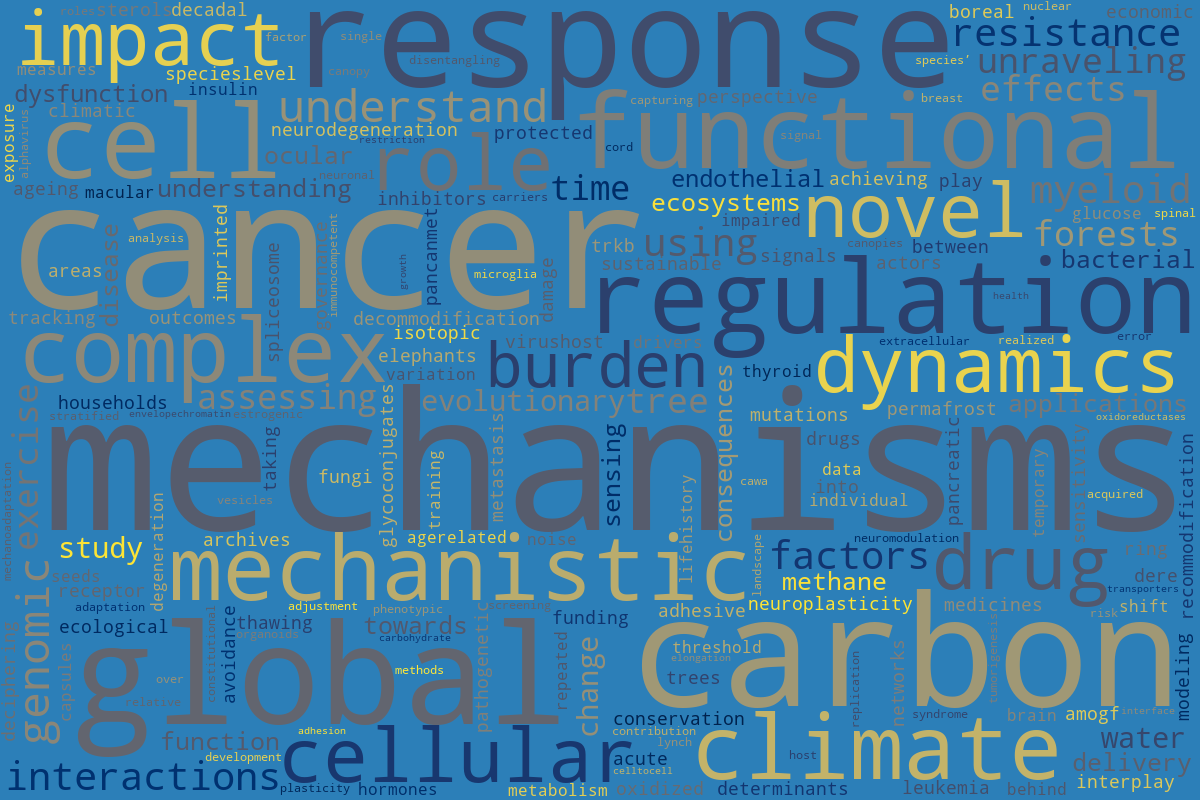

In [17]:
Image(filename=fout, width=600) 

## Research Council for Culture and Society

In [18]:
# Research Council for Culture and Society
z = dict()
for file in files[2:4]:
    header, df = readfile(file)
    text = ' '.join(df[2])
    frequencies = calculate_frequencies(text)
    for k, v in frequencies.items():
        #print(k, v, frequencies.get(k, 0))
        z[k] = z.get(k, 0) + frequencies.get(k, 0)



sorted(z.items(), key=operator.itemgetter(1), reverse=True)[:20]

[('young', 4),
 ('policy', 4),
 ('politics', 3),
 ('human', 3),
 ('learning', 3),
 ('neural', 3),
 ('mental', 3),
 ('world', 3),
 ('finnish', 3),
 ('society', 3),
 ('change', 3),
 ('mobilities', 3),
 ('digital', 3),
 ('early', 2),
 ('europe', 2),
 ('humor', 2),
 ('borders', 2),
 ('collective', 2),
 ('security', 2),
 ('children', 2)]

In [19]:

cloud = wordcloud.WordCloud(
    width=1200, 
    height=800,
    background_color='white', 
    colormap='winter',
)
cloud.generate_from_frequencies(z)
fout = 'aka_ky.png'
cloud.to_file(fout)

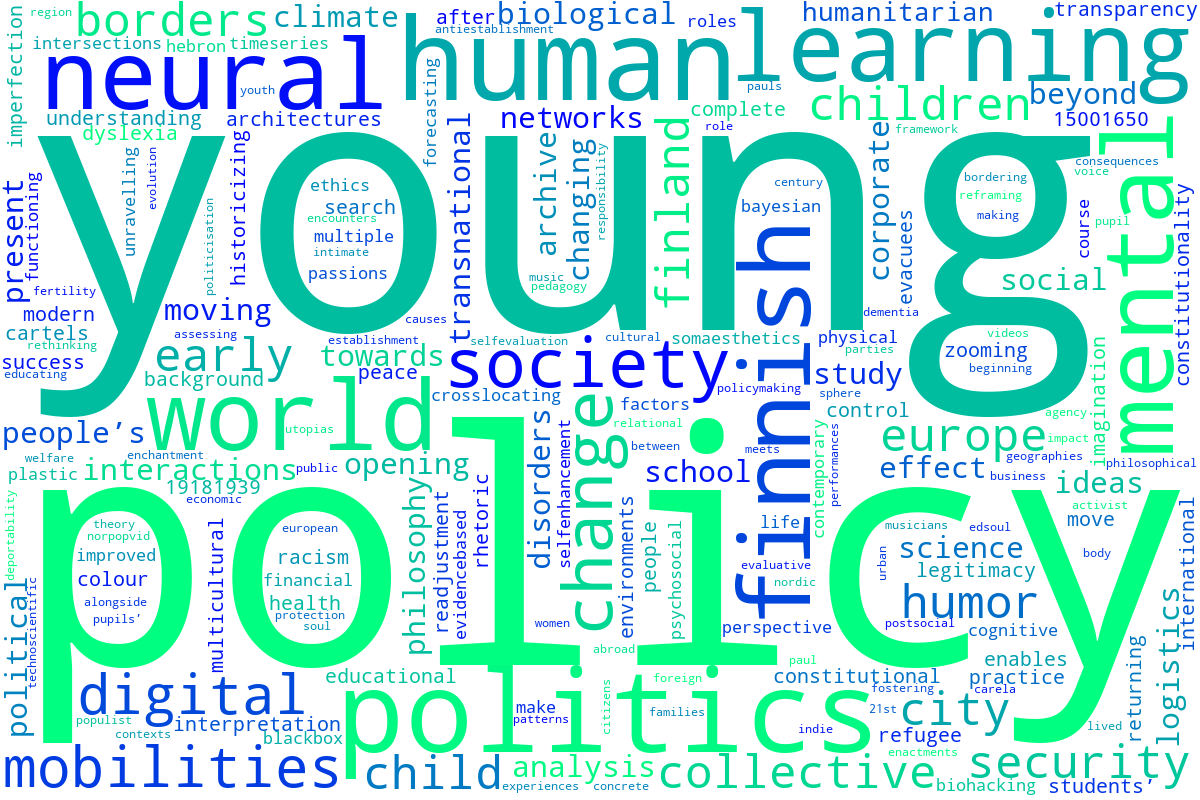

In [20]:
Image(filename=fout, width=600) 

In [21]:
## Research Council for Natural Sciences and Engineering

In [22]:
# Research Council for Natural Sciences and Engineering
z = dict()
for file in files[4:]:
    header, df = readfile(file)
    text = ' '.join(df[2])
    frequencies = calculate_frequencies(text)
    for k, v in frequencies.items():
        #print(k, v, frequencies.get(k, 0))
        z[k] = z.get(k, 0) + frequencies.get(k, 0)



sorted(z.items(), key=operator.itemgetter(1), reverse=True)[:20]

[('materials', 7),
 ('quantum', 5),
 ('towards', 5),
 ('applications', 5),
 ('model', 4),
 ('machines', 3),
 ('networks', 3),
 ('understanding', 3),
 ('energy', 3),
 ('organic', 3),
 ('dynamic', 3),
 ('properties', 3),
 ('electrical', 2),
 ('effect', 2),
 ('power', 2),
 ('nonlinear', 2),
 ('tunable', 2),
 ('analysis', 2),
 ('detection', 2),
 ('related', 2)]

In [23]:

cloud = wordcloud.WordCloud(
    width=1200, 
    height=800,
    background_color='#7fcdbb', 
    colormap='bone',
)
cloud.generate_from_frequencies(z)
fout = 'aka_ky.png'
cloud.to_file(fout)

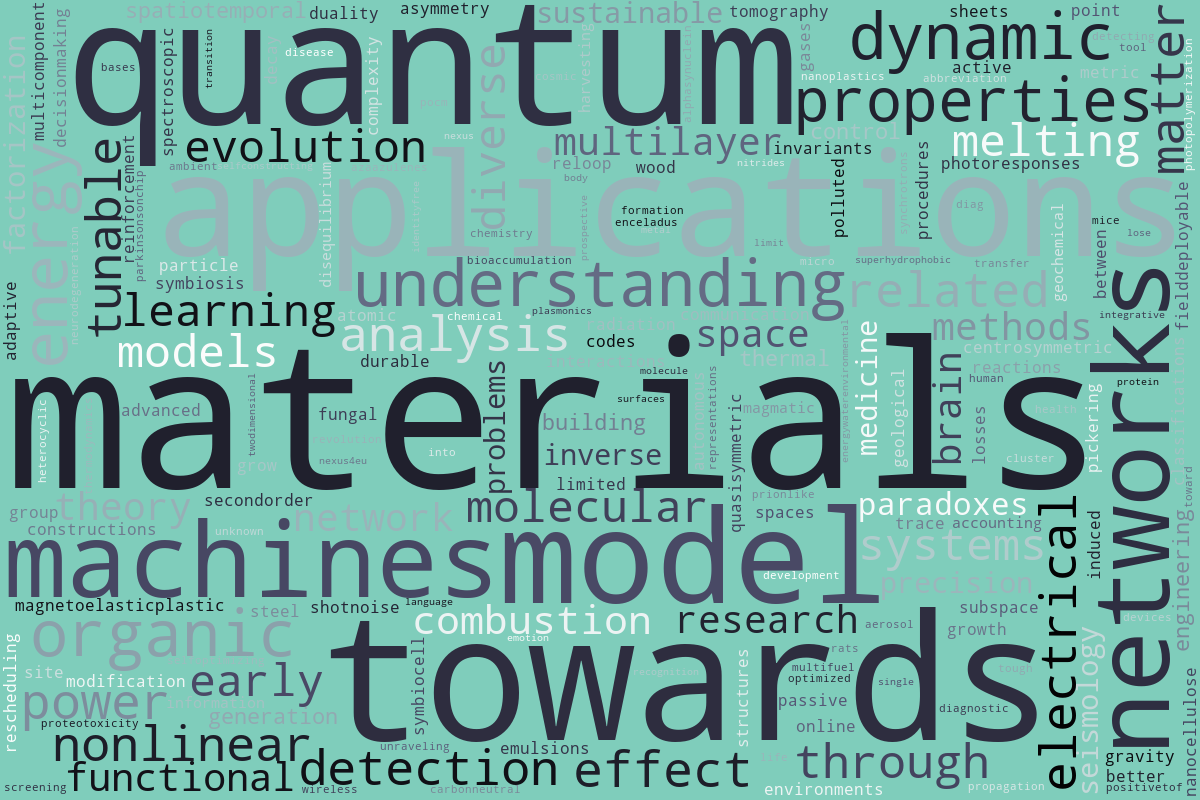

In [24]:
Image(filename=fout, width=600) 

In [25]:
# All councils
z = dict()
for file in files:
    header, df = readfile(file)
    text = ' '.join(df[2])
    frequencies = calculate_frequencies(text)
    for k, v in frequencies.items():
        #print(k, v, frequencies.get(k, 0))
        z[k] = z.get(k, 0) + frequencies.get(k, 0)



sorted(z.items(), key=operator.itemgetter(1), reverse=True)[:20]

[('towards', 9),
 ('cancer', 8),
 ('mechanisms', 8),
 ('applications', 7),
 ('materials', 7),
 ('networks', 6),
 ('functional', 6),
 ('understanding', 6),
 ('model', 6),
 ('interactions', 5),
 ('climate', 5),
 ('change', 5),
 ('impact', 5),
 ('analysis', 5),
 ('carbon', 5),
 ('learning', 5),
 ('quantum', 5),
 ('response', 4),
 ('global', 4),
 ('regulation', 4)]

In [26]:
# Which are the most successful overall?
data = pd.concat([readfile(file)[1] for file in files]).reset_index(drop=True)


In [27]:
data = data.replace({
    'AALTO': 'Aalto University',
    'HY': 'University of Helsinki',
    'TAU': 'Tampere University',
    'ÅA': 'Åbo Akademi University',
    'JYU': 'University of Jyväskylä',
    'OY' : 'University of Oulu',
    'IL' : 'Finnish Meteorological Institute',
    'LUKE': 'Natural Resources Institute Finland',
    'LUT': 'Lappeenranta-Lahti University of Technology LUT',
    'UEF': 'University of Eastern Finland',
} )

In [28]:
data[1].value_counts()

University of Helsinki                             63
Aalto University                                   27
Tampere University                                 19
University of Eastern Finland                      15
University of Jyväskylä                            14
University of Turku                                10
University of Oulu                                  8
Åbo Akademi University                              4
Natural Resources Institute Finland                 4
Lappeenranta-Lahti University of Technology LUT     3
Finnish Meteorological Institute                    3
VTT OY                                              2
Helsinki University Central Hospital                1
The Youth Research Society                          1
Name: 1, dtype: int64

In [29]:
(data[1].value_counts()*100/data[1].shape[0]).round(2)

University of Helsinki                             36.21
Aalto University                                   15.52
Tampere University                                 10.92
University of Eastern Finland                       8.62
University of Jyväskylä                             8.05
University of Turku                                 5.75
University of Oulu                                  4.60
Åbo Akademi University                              2.30
Natural Resources Institute Finland                 2.30
Lappeenranta-Lahti University of Technology LUT     1.72
Finnish Meteorological Institute                    1.72
VTT OY                                              1.15
Helsinki University Central Hospital                0.57
The Youth Research Society                          0.57
Name: 1, dtype: float64

In [30]:
# total funding
(data.groupby(1)[6].sum()).sort_values(ascending=False)#*100/data[6].sum()

1
University of Helsinki                             20382836
Aalto University                                    8628110
Tampere University                                  6625262
University of Jyväskylä                             5197720
University of Eastern Finland                       4324649
University of Turku                                 3334769
University of Oulu                                  2164747
Natural Resources Institute Finland                 1400179
Åbo Akademi University                              1338246
Lappeenranta-Lahti University of Technology LUT      977796
Finnish Meteorological Institute                     937480
VTT OY                                               574310
The Youth Research Society                           438874
Helsinki University Central Hospital                 438874
Name: 6, dtype: int32